In [69]:
import pandas as pd
import numpy as np
from decimal import Decimal
from ans import generate_string, code_uabs, decode_uabs
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1)

%matplotlib inline

In [115]:
def run_trial(p, msg_len, N, ALPHABET=('a', 'b')):
    d = {}
    d['p'] = float(p[0])
    d['length'] = msg_len
    d['trials'] = N
    entropy = []
    for i in range(N):
        msg = generate_string(msg_len, alphabet=ALPHABET, prob=p)
        code = code_uabs(msg, alphabet=ALPHABET, prob=p)
        entropy.append(np.log2(float(code)))
        
        decoded_msg = decode_uabs(code, alphabet=ALPHABET, prob=p)
        
        assert decoded_msg == msg,(
            ("Message: ", msg),
            ("Code: ", code),
            ("Entropy: %.2f bits (Orig: %.2f)" % (np.log2(float(code)), len(msg))),
            ("Decoded: ", decoded_msg),
            ("Matching: ", decoded_msg == msg))
            
    d['entropy'] = pd.Series(entropy)
    d['actual_bits'] = d['entropy'].mean()
    prob = [float(x) for x in p]
    d['ideal_bits'] = (-np.array(prob) * np.log2(np.array(prob)) * msg_len).sum()
    d['actual_ratio'] = (msg_len / d['entropy'].mean())
    d['ideal_ratio'] = (1.0 / (-np.array(prob) * np.log2(np.array(prob))).sum())
    return d

In [124]:
experiments = []
for p in [0.01, 0.05, 0.1, 0.25, 0.5]:
    for msg_len in [10, 20, 30, 40, 50, 60]:
        prob = [round(Decimal(x), 4) for x in [p, 1.0 - p]]
        experiments.append(run_trial(prob, msg_len,  N=100))
df = pd.DataFrame(experiments)
df.head()

,p,length,trials,entropy,actual_bits,ideal_bits,actual_ratio,ideal_ratio
0,0.01,10,100,0 3.459432 1 3.459432 2 3.45943...,4.040679,0.807931,2.474832,12.377289
1,0.01,20,100,0 4.392317 1 4.392317 2 16.45601...,5.622999,1.615863,3.556821,12.377289
2,0.01,30,100,0 4.954196 1 4.954196 2 4.95419...,6.774561,2.423794,4.428331,12.377289
3,0.01,40,100,0 9.758223 1 5.357552 2 17.89045...,7.275470,3.231725,5.497927,12.377289
4,0.01,50,100,0 10.568906 1 5.672425 2 5.67242...,8.444830,4.039657,5.920782,12.377289


In [125]:
df.describe()

,p,length,trials,actual_bits,ideal_bits,actual_ratio,ideal_ratio
count,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000
mean,0.182000,35.000000,100.0,20.409514,18.532247,2.304407,4.046757
std,0.181648,17.370208,0.0,15.417650,16.181579,1.534086,4.328895
min,0.010000,10.000000,100.0,4.040679,0.807931,0.949131,1.000000
25%,0.050000,20.000000,100.0,8.549951,5.067676,1.168318,1.232623
50%,0.100000,35.000000,100.0,15.948703,14.194858,1.919470,2.132216
75%,0.250000,50.000000,100.0,28.032365,27.189388,2.762977,3.491657
max,0.500000,60.000000,100.0,60.562420,60.000000,6.468756,12.377289


Text(0.5, 1.0, 'Compression Ratio vs. Message Length for Various p')

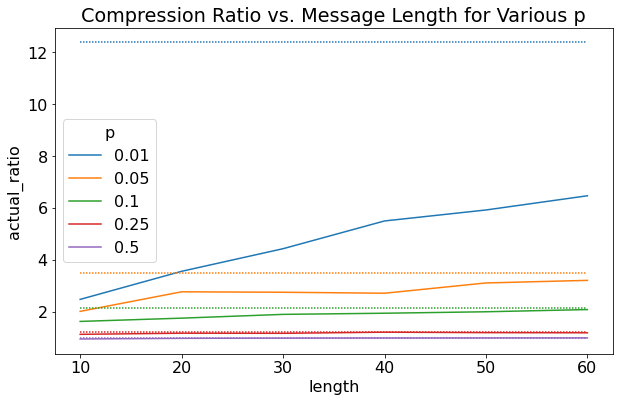

In [136]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(10, 6))
num_lines = len(set(df['p']))
sns.lineplot(ax=ax, data=df, x='length', y='actual_ratio', hue='p',
             palette=sns.color_palette("tab10", n_colors=len(set(df['p']))))
sns.lineplot(ax=ax, data=df, x='length', y='ideal_ratio', hue='p', style=[1] * len(df),
             palette=sns.color_palette("tab10", n_colors=num_lines),
             dashes=[(1, 1)], legend=False)
plt.title('Compression Ratio vs. Message Length for Various p')

In [127]:
df.tail()

,p,length,trials,entropy,actual_bits,ideal_bits,actual_ratio,ideal_ratio
25,0.5,20,100,0 20.239363 1 20.557450 2 20.85092...,20.539838,20.0,0.973718,1.0
26,0.5,30,100,0 30.121229 1 30.498556 2 30.80234...,30.539543,30.0,0.982333,1.0
27,0.5,40,100,0 40.852452 1 40.471073 2 40.47467...,40.548270,40.0,0.986479,1.0
28,0.5,50,100,0 50.797801 1 50.823860 2 50.10067...,50.557648,50.0,0.988970,1.0
29,0.5,60,100,0 60.199079 1 60.524546 2 60.50891...,60.562420,60.0,0.990713,1.0
